In [ ]:
import import_ipynb
import data_extraction
import seaborn as sns
import matplotlib.pyplot as plt

#### Why use pct_change() for computing correlation?

In [2]:
ds = data_extraction.dataset

In [3]:
ds.head()

,T,VZ,SP&500
timestamp,,,
2019-01-02,29.54,56.02,29.86
2019-01-03,29.58,56.22,29.02
2019-01-04,30.34,56.36,29.90
2019-01-07,30.89,56.72,30.79
2019-01-08,31.28,58.38,31.59


In [4]:
correlation_ds = ds["T"].corr(ds["VZ"])

In [5]:
print(correlation_ds)

0.40016069342885296


In [6]:
per_change = ds.pct_change()

In [7]:
per_change.head()

,T,VZ,SP&500
timestamp,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,0.001354,0.003570,-0.028131
2019-01-04,0.025693,0.002490,0.030324
2019-01-07,0.018128,0.006388,0.029766
2019-01-08,0.012625,0.029267,0.025982


In [8]:
corr_per_change= per_change["T"].corr(per_change["VZ"])

In [9]:
print(corr_per_change)

0.7101822182602753


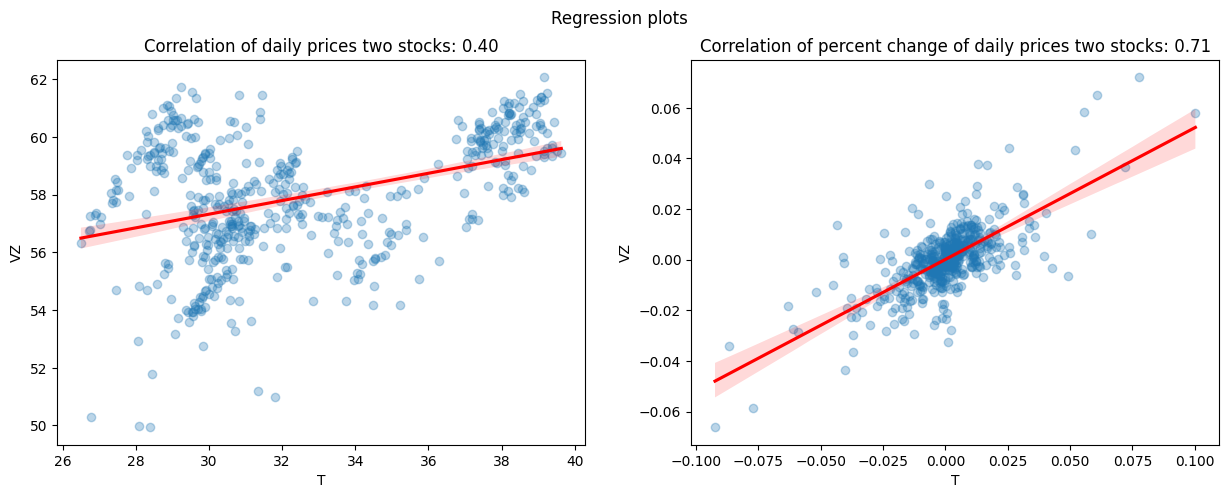

In [10]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Regression plots')
sns.regplot(ax=axes[0],data=ds, x = "T", y = "VZ",line_kws={"color": "red"},scatter_kws={"alpha" : 0.3});
axes[0].set_title("Correlation of daily prices two stocks: {:.2f}".format(correlation_ds))

sns.regplot(ax=axes[1],data=per_change,x = "T",y = "VZ",line_kws={"color": "red"},scatter_kws={"alpha" : 0.3})
axes[1].set_title("Correlation of percent change of daily prices two stocks: {:.2f}".format(corr_per_change))

plt.show()

In [11]:
daily_returns = ds.pct_change()

In [12]:
daily_returns.head()

,T,VZ,SP&500
timestamp,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,0.001354,0.003570,-0.028131
2019-01-04,0.025693,0.002490,0.030324
2019-01-07,0.018128,0.006388,0.029766
2019-01-08,0.012625,0.029267,0.025982


In [13]:
autocorr_daily = daily_returns['T'].autocorr()

In [14]:
autocorr_daily

-0.15826559330163084

#### Autocorrelation Weekly

In [15]:
weekly = ds.resample(rule='W').last()

In [16]:
weekly.head()

,T,VZ,SP&500
timestamp,,,
2019-01-06,30.34,56.36,29.90
2019-01-13,30.87,58.02,33.25
2019-01-20,30.96,57.09,34.38
2019-01-27,30.66,56.40,34.07
2019-02-03,30.00,54.55,33.16


In [17]:
weekly_returns = weekly.pct_change()

In [18]:
weekly_returns.head()

,T,VZ,SP&500
timestamp,,,
2019-01-06,NaN,NaN,NaN
2019-01-13,0.017469,0.029454,0.112040
2019-01-20,0.002915,-0.016029,0.033985
2019-01-27,-0.009690,-0.012086,-0.009017
2019-02-03,-0.021526,-0.032801,-0.026710


In [19]:
autocorr_weekly = weekly_returns['T'].autocorr()

In [20]:
autocorr_weekly

-0.20652930281434517